In [ ]:
#Proses Import Library

#numpy library untuk proses komputasi numering
import numpy as np
#pandas merupakan library untuk mengolah tabel data
import pandas as pd
#matplotlib untuk memvisualisasikan data dan menampilkan grafik
import matplotlib.pyplot as plt
#seaborn berfungsi sebagai library untuk membandingkan hubungan antara 2 variabel dalam satu grafik
import seaborn as sns
#melakukan konfigurasi pada grafik sns, seperti model garid, warna garis dll.
sns.set()
#warning library dengan fungsi untuk memberikan himbauan bahwa ada beberapa code sudah tidak digunakan lagi 
import warnings
warnings.filterwarnings('ignore')
#sklearn preprocessing berfungsi untuk menstandarisasi dataset
from sklearn.preprocessing import StandardScaler
#sklearn.model_selection untuk melakukan pembagian data random train dan test subsets
from sklearn.model_selection import train_test_split
#sklearn neighbors untuk memanggil fungsi-fungsi unsupervised dan supervised learning
from sklearn.neighbors import KNeighborsClassifier
#sklearn.metrics untuk mengimplementasikan fungsi several loss, score dan utility untuk mengevaluasi performance klasifikasi
from sklearn.metrics import confusion_matrix
#library dibawah untuk menghubungkan google colab dan google drive
from google.colab import drive
#Menvisualisasikan data berupa grafik pada frontend
%matplotlib inline


#### Diketahui
beban_1 = Air Conditioner

beban_2 = Lampu

beban_3 = Projector

beban_4 = Komputer

beban_5 = Charger Laptop

beban_6 = Kipas angin

In [ ]:
#proses untuk menghubungkan google colab dan google drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
#code berikut untuk membaca dataset pada gdrive dan dipindahkan menjadi variabel Load

load = pd.read_csv(r"/content/drive/MyDrive/SISTEM CERDAS/fiturbebanlengkap.csv")

#proses berikut untuk mengambil data dari kolom ke 5 hingga akhir
load = load.drop(load.iloc[:,:5], axis=1)

#untuk menampilkan 5 baris data pertama variabel Load
load.head()

,activepower,reactivepower,apparentpower,Label
0,303.1,303.02,303.02,1
1,303.1,303.02,303.02,1
2,303.1,303.02,303.02,1
3,303.0,303.02,303.02,1
4,303.0,303.02,303.02,1


In [ ]:
load.shape 
#untuk melihat bentuk dari data set, dimana dataset ini terdiri dari 4 kolom dan 87792 baris

(87792, 4)

In [ ]:
#proses berikut menginformasikan jumlah data null, colom, penggunaan memory, jenis data dan lainnya pada dataset
load.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87792 entries, 0 to 87791
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0    activepower    87792 non-null  float64
 1    reactivepower  87792 non-null  float64
 2    apparentpower  87792 non-null  float64
 3   Label           87792 non-null  int64  
dtypes: float64(3), int64(1)
memory usage: 2.7 MB


In [ ]:
#mengkopi dari variabel Load menjadi variabel Load_copy
load_copy=load.copy(deep=True)
#untuk mengambil 3 kolom pertama dari variabel Load_copy
load_copy=load_copy.iloc[:, 0:3]
#untuk memeriksa apakah ada data null atau tidak
print(load_copy.isnull().sum())


 activepower      0
 reactivepower    0
 apparentpower    0
dtype: int64


In [ ]:
dg=load.groupby('Label').agg(['count', 'mean','std','min','max','median']).T
dg

#untuk mengelompokan data berdasarkan kolom "label", dan menampilkan jumlah, rata-rata, standar deviasi, nilai minimal, nilai maksimal, dan nilai tengah

Label                            1             2            3             4  \
 activepower   count   4440.000000  32656.000000  4152.000000  32548.000000   
               mean      54.409775     61.180631    39.904167     59.289794   
               std      115.777480     66.382305    29.183763    131.792491   
               min        1.300000      1.100000     2.300000      0.800000   
               max      312.300000    720.800000    70.900000    376.100000   
               median     1.500000      1.200000    61.800000      0.900000   
 reactivepower count   4440.000000  32656.000000  4152.000000  32548.000000   
               mean      60.780944    121.808746    67.665195     66.211303   
               std      112.877923    123.855313    41.891392    128.871826   
               min        9.048000      8.940000    13.710000      6.744000   
               max      313.161000    840.560000   109.536000    375.750000   
               median     9.140000      9.212000   100.320000      9.188000   
 apparentpower count   4440.000000  32656.000000  4152.000000  32548.000000   
               mean      54.571281     61.270197    39.743329     59.351909   
               std      115.712290     66.310347    29.184655    131.718722   
               min        1.460480      1.177800     2.062800      0.675300   
               max      313.161000    722.881600    71.198400    375.750000   
               median     1.643760      1.377000    62.198400      1.014200   

Label                            5            6  
 activepower   count   8334.000000  5662.000000  
               mean      32.491637   681.878241  
               std       10.816431   101.857708  
               min       16.500000    38.700000  
               max       54.200000   716.500000  
               median    28.700000   700.200000  
 reactivepower count   8334.000000  5662.000000  
               mean      60.067627   685.919746  
               std       18.624729    81.813904  
               min       31.906000    73.120000  
               max       94.874000   717.120000  
               median    53.245000   700.280000  
 apparentpower count   8334.000000  5662.000000  
               mean      32.483737   682.090463  
               std       10.768352   101.921042  
               min       15.953000    38.022400  
               max       54.078180   717.120000  
               median    28.866240   700.280000

AxesSubplot(0.125,0.125;0.775x0.755)


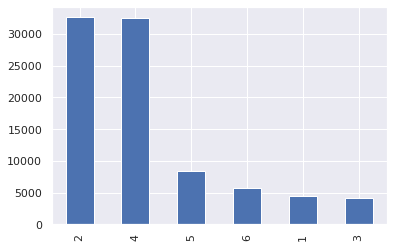

In [ ]:
#untuk menampilkan diagram batang jumlah data pada setiap label
print(load.Label.value_counts().plot(kind='bar'))

In [ ]:
#proses ini untuk menstandarisasi data
scX=StandardScaler()
X=pd.DataFrame(scX.fit_transform(load_copy),
    columns=['activepower', 'reactivepower','apparentpower'])
print(X)

       activepower  reactivepower  apparentpower
0         1.134483       0.940552       1.133635
1         1.134483       0.940552       1.133635
2         1.134483       0.940552       1.133635
3         1.133934       0.940552       1.133635
4         1.133934       0.940552       1.133635
...            ...            ...            ...
87787     3.328113       3.070471       3.333316
87788     3.330858       3.072220       3.335122
87789     3.330309       3.072220       3.335122
87790     3.330309       3.072220       3.335122
87791     3.329760       3.070471       3.333316

[87792 rows x 3 columns]


In [ ]:
#y sebagai indikasi label
y=load.Label
print(y)

0        1
1        1
2        1
3        1
4        1
        ..
87787    6
87788    6
87789    6
87790    6
87791    6
Name: Label, Length: 87792, dtype: int64


In [ ]:
#code berikut untuk membagi data test dan data train, pada simulasi ini data test sebanyak 1/3 dan data train sebanyak 2/3
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
#proses ini berfungsi untuk mencari nilai K terbaik, yang diawali dengan inisiasi array test dan train score
test_scores = []
train_scores = []
#melakukan looping sebnyak 15 kali, untuk mencari nilai K terbaik antara 1-15
for i in range(1,15):

#inisialisasi nilai K terhadap i dimana i adalah jumlah perulangan atau looping
    knn = KNeighborsClassifier(i)
#untuk melakukan proses training dan meneruskan parameter hasil training pada data testing
    knn.fit(X_train,y_train)
#untuk menambahakan score training pada array train_scores    
    train_scores.append(knn.score(X_train,y_train))
 #untuk menambahakan score testing pada array test_scores    
    test_scores.append(knn.score(X_test,y_test))

print(test_scores)
print(train_scores)

[0.9991457080371788, 0.9990431930016402, 0.9988039912520503, 0.9986673045379989, 0.9986673045379989, 0.9982572443958447, 0.9983255877528704, 0.9982572443958447, 0.9981547293603061, 0.9980180426462548, 0.9979838709677419, 0.9977788408966648, 0.9976763258611263, 0.9973687807545106]
[0.9999145708037179, 0.9995728540185894, 0.999316566429743, 0.9992653089119737, 0.9989577638053582, 0.9988381629305632, 0.9986160470202297, 0.9984622744669218, 0.9983939311098962, 0.9982059868780755, 0.9982572443958447, 0.9981376435210497, 0.9980009568069984, 0.9979155276107162]


In [ ]:
#memindahkan nilai maksimum pada arry test_score ke max_test_score
max_test_score = max(test_scores)
#mencari indeks pada max_test_score dengan cara melakukan perulangan dan di cek satupersatu apakah nilai pada indeks tersebut sama dengan max_test_score
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
#untuk menampilkan max test score beserta nilai K nya
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 99.91457080371788 % and k = [1]


In [ ]:
#memindahkan nilai maksimum pada arry train_score ke max_train_score
max_train_score = max(train_scores)
#mencari indeks pada max_train_score dengan cara melakukan perulangan dan di cek satupersatu apakah nilai pada indeks tersebut sama dengan max_train_score
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
#untuk menampilkan max train score beserta nilai K nya
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 99.99145708037179 % and k = [1]


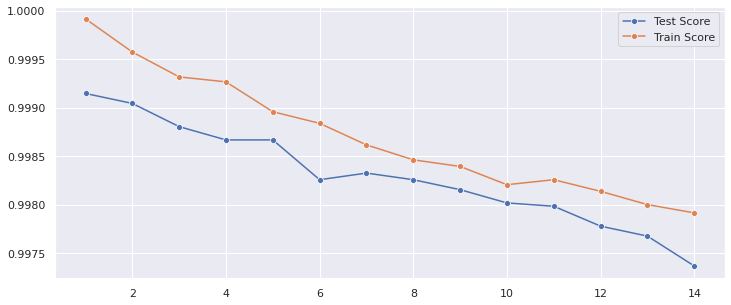

In [ ]:
#menginisialisasikan ukuran grafik
plt.figure(figsize=(12,5))
#menambahkan data berupa lineplot yang bersisi data test scores dan train scores dari k=1 s/d k=15
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')
p = sns.lineplot(range(1,15),train_scores,marker='o',label='Train Score')

In [ ]:
#berdasarkan langkah diatas, kami melakukan klasifikasi dengan menggunakan nilai K=1 
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.9991457080371788

In [ ]:
#hasil dari klasifikasi pada proses diatas akan ditampilkan menjadi confusion matrix yang dapat dilihat pada output matrix berikut
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
Actual,,,,,,,
1,1475,1,0,3,1,0,1480
2,1,10856,2,3,2,22,10886
3,0,0,1380,0,4,0,1384
4,11,2,9,10819,8,0,10849
5,0,0,0,0,2778,0,2778
6,0,8,0,0,0,1879,1887
All,1487,10867,1391,10825,2793,1901,29264
